<a href="https://colab.research.google.com/github/saanvis404/Crypto/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required library
import requests

# URL to get Bitcoin price in EUR from CoinGecko
url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=eur"

# Send request and get response
response = requests.get(url)

# Parse the JSON response
data = response.json()

# Extract price
btc_price = data['bitcoin']['eur']

# Display the price
print(f"💰 Current Bitcoin Price: €{btc_price}")


💰 Current Bitcoin Price: €90659


In [ ]:
# Set a price threshold
threshold_price = 70000  # you can change this

# Check and alert
if btc_price > threshold_price:
    print("🚨 ALERT: Bitcoin price is ABOVE your threshold!")
else:
    print("✅ Bitcoin price is below your threshold.")


🚨 ALERT: Bitcoin price is ABOVE your threshold!


In [ ]:
import time

# Check every 60 seconds
while True:
    response = requests.get(url)
    btc_price = response.json()['bitcoin']['eur']
    print(f"Current BTC Price: €{btc_price}")

    if btc_price > threshold_price:
        print("🚨 ALERT: Price above threshold!")
    else:
        print("✅ Price is below threshold.")

    time.sleep(60)  # wait 60 seconds


NameError: name 'requests' is not defined

In [ ]:
import time
import requests  # 👈 This line is the fix

# Check every 60 seconds
while True:
    response = requests.get("https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=eur")
    btc_price = response.json()['bitcoin']['eur']
    print(f"Current BTC Price: €{btc_price}")

    if btc_price > threshold_price:
        print("🚨 ALERT: Price above threshold!")
    else:
        print("✅ Price is below threshold.")

    time.sleep(60)  # wait 60 seconds


Current BTC Price: €90877


NameError: name 'threshold_price' is not defined

In [ ]:
import time
import requests

threshold_price = 70000  # Set your custom threshold here

# Check every 60 seconds
while True:
    response = requests.get("https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=eur")
    btc_price = response.json()['bitcoin']['eur']
    print(f"Current BTC Price: €{btc_price}")

    if btc_price > threshold_price:
        print("🚨 ALERT: Price above threshold!")
    else:
        print("✅ Price is below threshold.")

    time.sleep(60)  # wait 60 seconds before checking again


Current BTC Price: €90877
🚨 ALERT: Price above threshold!
Current BTC Price: €90856
🚨 ALERT: Price above threshold!
Current BTC Price: €90856
🚨 ALERT: Price above threshold!
Current BTC Price: €90810
🚨 ALERT: Price above threshold!


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import datetime


In [ ]:
import matplotlib.pyplot as plt
import datetime

# To store price history
price_history = []
time_stamps = []


In [51]:
def check_price(b):
    with output:
        clear_output()
        coin = coin_selector.value
        url = f"https://api.coingecko.com/api/v3/simple/price?ids={coin}&vs_currencies=eur"
        try:
            response = requests.get(url)
            data = response.json()
            print("🔎 Raw API Response:", data)  # For debugging — optional

            # ✅ Check if coin and 'eur' price exist
            if coin in data and 'eur' in data[coin]:
                price = data[coin]['eur']
                now = datetime.datetime.now().strftime("%H:%M:%S")

                # Store for graph
                price_history.append(price)
                time_stamps.append(now)

                # Display current price
                print(f"₿ Current {coin.capitalize()} Price: €{price}")

                # Alert logic
                if price > threshold_slider.value:
                    print("🚨 ALERT: Price is ABOVE your threshold!")
                else:
                    print("✅ Price is BELOW your threshold.")

                # Plot
                plt.figure(figsize=(8, 4))
                plt.plot(time_stamps, price_history, marker='o', linestyle='-')
                plt.title(f"{coin.capitalize()} Price Over Time")
                plt.xlabel("Time")
                plt.ylabel("Price (€)")
                plt.xticks(rotation=45)
                plt.grid(True)
                plt.tight_layout()
                plt.show()

            else:
                print(f"❗ Price data for '{coin}' not found in API response:", data)

        except Exception as e:
            print("❌ Error fetching price:", e)

In [54]:
check_button.on_click(check_price)
display(coin_selector, threshold_slider, check_button, output)


Dropdown(description='Cryptocurrency:', layout=Layout(width='80%'), options=(('Bitcoin (BTC)', 'bitcoin'), ('E…

IntSlider(value=70000, description='Price Threshold (€):', layout=Layout(width='80%'), max=100000, min=100, st…

Button(button_style='success', description='🔍 Check Price', layout=Layout(width='40%'), style=ButtonStyle())

Output()

🪙 Current Ethereum Price: €2109.81
✅ Price is BELOW your threshold.


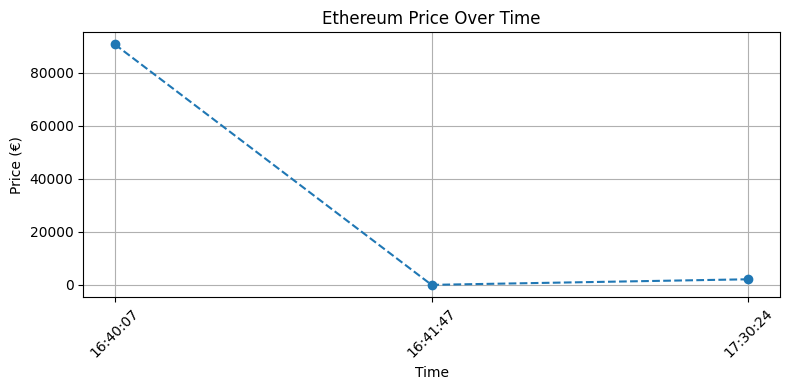

In [55]:
# Import required packages
import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime

# Storage for plotting
price_history = []
time_stamps = []

# Dropdown for coin selection
coin_selector = widgets.Dropdown(
    options=[
        ('Bitcoin (BTC)', 'bitcoin'),
        ('Ethereum (ETH)', 'ethereum'),
        ('Dogecoin (DOGE)', 'dogecoin')
    ],
    value='bitcoin',
    description='Cryptocurrency:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

# Slider for threshold
threshold_slider = widgets.IntSlider(
    value=70000,
    min=100,
    max=100000,
    step=500,
    description='Price Threshold (€):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

# Button to check price
check_button = widgets.Button(
    description='📈 Check Price',
    button_style='success',
    layout=widgets.Layout(width='40%')
)

# Output display area
output = widgets.Output()

# Function to check and display price
def check_price(b):
    with output:
        clear_output()
        coin = coin_selector.value
        url = f"https://api.coingecko.com/api/v3/simple/price?ids={coin}&vs_currencies=eur"
        try:
            response = requests.get(url)
            data = response.json()
            if coin in data:
                price = data[coin]['eur']
                timestamp = datetime.now().strftime('%H:%M:%S')
                price_history.append(price)
                time_stamps.append(timestamp)

                print(f"🪙 Current {coin.capitalize()} Price: €{price}")

                # Alert
                if price > threshold_slider.value:
                    print("🚨 ALERT: Price is ABOVE your threshold!")
                else:
                    print("✅ Price is BELOW your threshold.")

                # Plot
                plt.figure(figsize=(8, 4))
                plt.plot(time_stamps, price_history, marker='o', linestyle='--')
                plt.title(f"{coin.capitalize()} Price Over Time")
                plt.xlabel("Time")
                plt.ylabel("Price (€)")
                plt.xticks(rotation=45)
                plt.grid(True)
                plt.tight_layout()
                plt.show()

            else:
                print(f"❗ Price data for '{coin}' not found in API response:", data)
        except Exception as e:
            print("❌ Error fetching price:", e)

# Connect button to function
check_button.on_click(check_price)

# Display everything
display(coin_selector, threshold_slider, check_button, output)
